In [ ]:
# To mount the google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!git clone https://github.com/ultralytics/yolov5  # clone repo
%cd yolov5
%pip install -qr requirements.txt  # install dependencies

Setup complete. Using torch 1.8.1+cu101 (Tesla T4)


In [ ]:
# Use conda to install pytorch with cuda as its easier. torch = 1.8.1 and cuda = 10.1
import torch #Torch with CUDA support.
from IPython.display import Image, clear_output  # to display images

clear_output()
print(f"Setup complete. Using torch {torch.__version__} ({torch.cuda.get_device_properties(0).name if torch.cuda.is_available() else 'CPU'})")

Setup complete. Using torch 1.8.1+cu101 (Tesla K80)


In [ ]:
!unzip -q ../train_data.zip -d ../

/content/yolov5


In [ ]:
# Change the custom_data.yaml accordingly with paths for train and val data. Remove all the unwanted classes from coco128.yaml and write "pistol", give the appropriate path for "train" and "val" too and rename the new yaml as "custom_data.yaml"
# make sure the yaml file is in the "data" folder of "yolov5" folder
!python train.py --img 640 --batch 5 --epochs 50 --data custom_data.yaml --weights yolov5s.pt --nosave --cache

github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v5.0-76-g57b0d3a torch 1.8.1+cu101 CUDA:0 (Tesla T4, 15109.75MB)

Namespace(adam=False, artifact_alias='latest', batch_size=5, bbox_interval=-1, bucket='', cache_images=True, cfg='', data='./data/custom_data.yaml', device='', entity=None, epochs=50, evolve=False, exist_ok=False, global_rank=-1, hyp='data/hyp.scratch.yaml', image_weights=False, img_size=[640, 640], label_smoothing=0.0, linear_lr=False, local_rank=-1, multi_scale=False, name='exp', noautoanchor=False, nosave=True, notest=False, project='runs/train', quad=False, rect=False, resume=False, save_dir='runs/train/exp2', save_period=-1, single_cls=False, sync_bn=False, total_batch_size=5, upload_dataset=False, weights='yolov5s.pt', workers=8, world_size=1)
tensorboard: Start with 'tensorboard --logdir runs/train', view at http://localhost:6006/
2021-05-10 08:43:17.503345: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened d

# 1. Inference

<img src="https://user-images.githubusercontent.com/26833433/114307955-5c7e4e80-9ae2-11eb-9f50-a90e39bee53f.png" width="900"> 

In [ ]:
# make sure to change the weights file. You'll get the location of it after training is complete. 
# weights are in ".pt" format.
!python detect.py --weights runs/train/exp2/weights/best.pt --img 640 --conf 0.30 --source /content/drive/MyDrive/gun_detection_yolov5/demo.mp4

Namespace(agnostic_nms=False, augment=False, classes=None, conf_thres=0.3, device='', exist_ok=False, hide_conf=False, hide_labels=False, img_size=640, iou_thres=0.45, line_thickness=3, name='exp', nosave=False, project='runs/detect', save_conf=False, save_crop=False, save_txt=False, source='/content/drive/MyDrive/gun_detection_yolov5/demo.mp4', update=False, view_img=False, weights=['runs/train/exp2/weights/best.pt'])
YOLOv5 🚀 v5.0-76-g57b0d3a torch 1.8.1+cu101 CUDA:0 (Tesla T4, 15109.75MB)

Fusing layers... 
Model Summary: 224 layers, 7053910 parameters, 0 gradients, 16.3 GFLOPS
video 1/1 (1/861) /content/drive/MyDrive/gun_detection_yolov5/demo.mp4: 640x384 1 pistol, Done. (0.010s)
video 1/1 (2/861) /content/drive/MyDrive/gun_detection_yolov5/demo.mp4: 640x384 1 pistol, Done. (0.013s)
video 1/1 (3/861) /content/drive/MyDrive/gun_detection_yolov5/demo.mp4: 640x384 1 pistol, Done. (0.012s)
video 1/1 (4/861) /content/drive/MyDrive/gun_detection_yolov5/demo.mp4: 640x384 1 pistol, Done. (

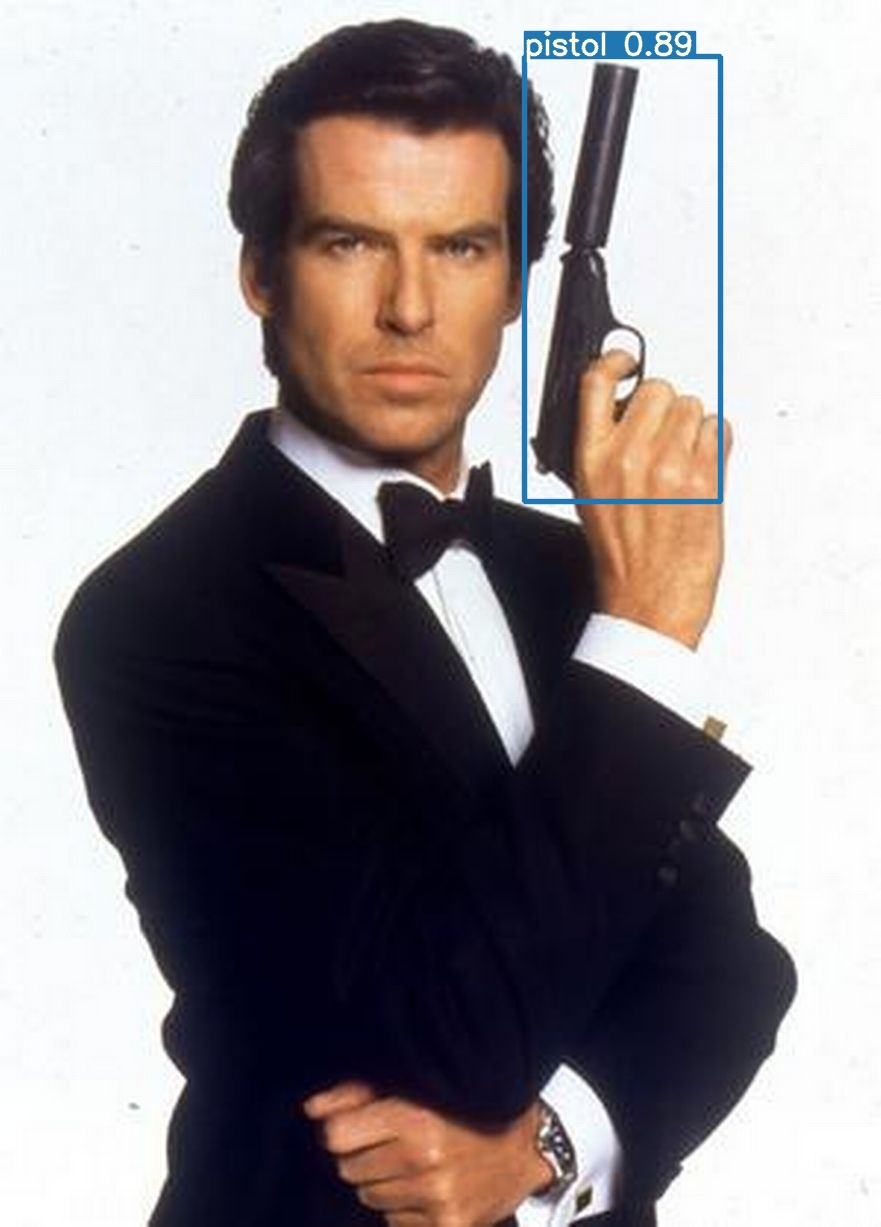

In [ ]:
#you'll get the location of output file after detect.py runs
Image(filename='runs/detect/exp7/test.jpg', width=600)